In [1]:
import importlib
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
# Import demographic data (e.g., gender)
# for each participant
filename = "2015-2016/DEMO_I.XPT"
demo_2016 = pd.read_sas(filename)
demo_2016.shape

(9971, 47)

In [3]:
# Participant identified in SEQN column
# Confirm dataset has only one entry per participant
demo_2016["SEQN"].is_unique

True

In [4]:
# Import body measurement data
filename = "2015-2016/BMX_I.XPT"
bmx_2016 = pd.read_sas(filename)
bmx_2016.shape

(9544, 26)

In [5]:
bmx_2016["SEQN"].is_unique

True

In [6]:
# Add bmx info to demo info
combined_2016 = demo_2016.merge(bmx_2016, how="left", on="SEQN")
combined_2016.shape

(9971, 72)

In [7]:
# Verify new column count meets expectations
# Should be number of cols in each dataframe minus 1 for shared col (SEQN)
len(combined_2016.columns) == len(demo_2016.columns) + len(bmx_2016.columns) - 1

True

In [8]:
# Add new column for survey year
new_col = "Survey_Year"
combined_2016[new_col] = "2015-2016"
combined_2016.shape

(9971, 73)

### Is BMI associated with income?

It is possible that BMI is affected by access to nutritious food that is less accessible for lower-income respondents.

This effect can be explored by looking at how close a respondent's family is to the poverty level, as measured by the variable INDFMPIR.

From the codebook:

Variable INDFMPIR - Ratio of family income to poverty

Decimal values ranging from 0.00 to 5.00.

This variable is the ratio of family income to poverty. The Department of Health and Human Services (HHS) poverty guidelines were used as the poverty measure to calculate this ratio. The poverty guidelines vary by family size and geographic location.

INDFMPIR was calculated by dividing family (or individual) income by the poverty guidelines specific to the survey year. The value was not computed if the respondent only reported income as < $20,000 or ≥ $20,000. Values at or above 5.00 were coded as 5.00 or more because of disclosure concerns. The values were not computed if the income data was missing.

Additional information can be found here: https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm

In [9]:
combined_2016["INDFMPIR"].dropna().values

array([4.39000000e+00, 1.32000000e+00, 1.51000000e+00, ...,
       5.39760535e-79, 4.22000000e+00, 3.54000000e+00])

In [10]:
# Drop na values for either poverty ratio or BMI

# Examine size before drop
combined_2016.shape

(9971, 73)

In [11]:
cols = ["INDFMPIR", "BMXBMI"]
combined_2016_cleaned = combined_2016.dropna(subset=cols, how="any")
combined_2016_cleaned.shape

(7887, 73)

In [12]:
x = combined_2016_cleaned["INDFMPIR"].values
y = combined_2016_cleaned["BMXBMI"].values

# test if same size

len(x) == len(y)

True

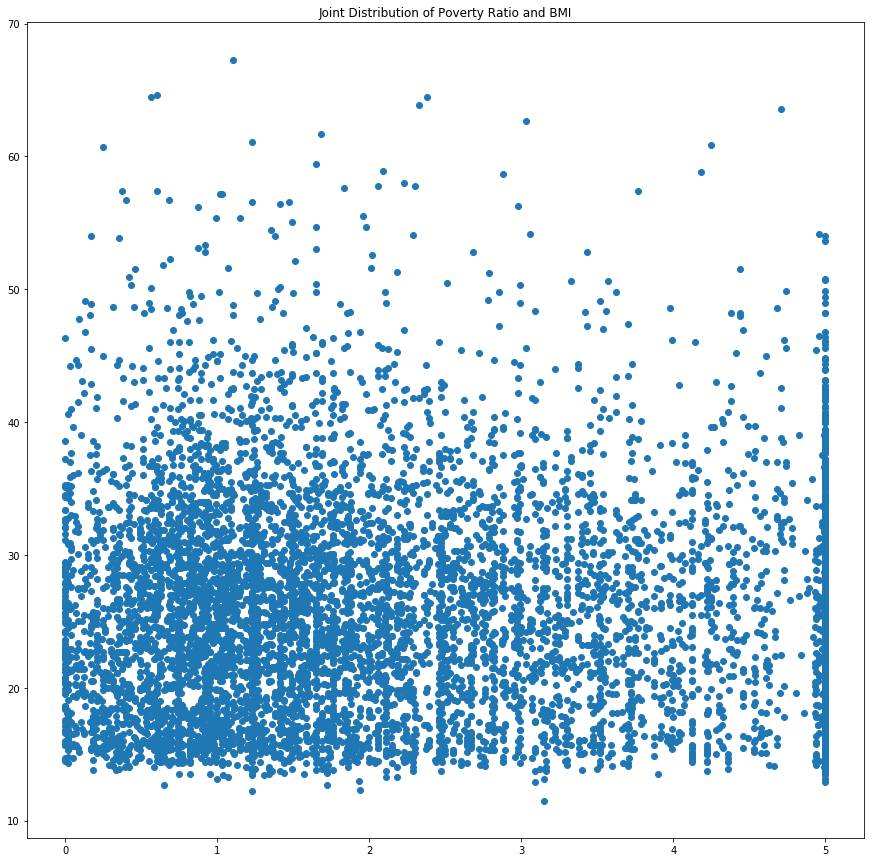

In [13]:
plt.figure(figsize=(15, 15))
plt.scatter(x = x, y = y)
plt.title("Joint Distribution of Poverty Ratio and BMI")
plt.show()

In [14]:
# Try plotting with seaborn

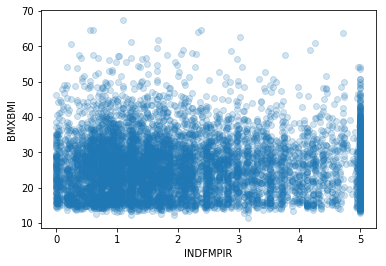

In [15]:
sns.regplot(x="INDFMPIR", y="BMXBMI", data=combined_2016, fit_reg=False, scatter_kws={"alpha": 0.2})

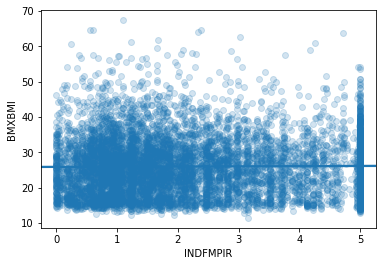

In [16]:
sns.regplot(x="INDFMPIR", y="BMXBMI", data=combined_2016, fit_reg=True, scatter_kws={"alpha": 0.2})

In [17]:
# The relationship, if any, looks very weak.
# Examine the correlation between these variables.

df = combined_2016_cleaned
df[cols].corr()

,INDFMPIR,BMXBMI
INDFMPIR,1.000000,0.010333
BMXBMI,0.010333,1.000000


In [18]:
# As suspected, there does not appear to be a linear relationship between
# poverty, as measured by income to poverty levels ratio, and BMI

In [19]:
# Stratify results by ethnicity to see if patterns emerge

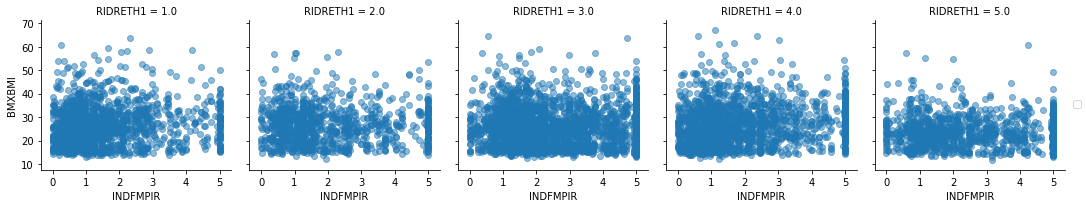

In [20]:
_ = sns.FacetGrid(df, col="RIDRETH1").map(plt.scatter, "INDFMPIR", "BMXBMI", alpha=0.5).add_legend()

In [21]:
df = combined_2016_cleaned
cols = ["INDFMPIR", "BMXBMI"]
race_col = "RIDRETH1"

df[race_col].value_counts(dropna=False).sort_index()

1.0    1446
2.0     988
3.0    2537
4.0    1698
5.0    1218
Name: RIDRETH1, dtype: int64

In [22]:
df = combined_2016_cleaned
cols = ["INDFMPIR", "BMXBMI"]
race_col = "RIDRETH1"
race_responses = sorted(df[race_col].unique())

for response in race_responses:
    race_filter = (df[race_col] == response)
    df_temp = df[race_filter]
    print(df_temp[cols].corr())
    print("\n")

          INDFMPIR    BMXBMI
INDFMPIR  1.000000  0.065509
BMXBMI    0.065509  1.000000


          INDFMPIR    BMXBMI
INDFMPIR  1.000000  0.007496
BMXBMI    0.007496  1.000000


          INDFMPIR    BMXBMI
INDFMPIR  1.000000 -0.005679
BMXBMI   -0.005679  1.000000


          INDFMPIR    BMXBMI
INDFMPIR  1.000000  0.166927
BMXBMI    0.166927  1.000000


          INDFMPIR    BMXBMI
INDFMPIR  1.000000 -0.050992
BMXBMI   -0.050992  1.000000




In [23]:
# Even within ethnicities, there does not appear to be a linear relationship between
# poverty and BMI

In [24]:
# A high BMI is sometimes said to be correlated with other health risk factors, such as high blood pressure
# Review these two factors to see if the data support this concern

In [29]:
# Blood pressure (BP) data is housed in a separate file; read data in
filename = "2015-2016/BPX_I.XPT"
bp_2016 = pd.read_sas(filename)
bp_2016.shape

(9544, 21)

In [30]:
# Verify SEQN column is present and unique
bp_2016["SEQN"].is_unique

True

In [31]:
# Add BP data to combined df
print("Combined data shape before merging BP data: {}".format(combined_2016.shape))
combined_2016 = combined_2016.merge(bp_2016, how="left", on="SEQN")
print("Combined data shape after merging BP data: {}".format(combined_2016.shape))

Combined data shape before merging BP data: (9971, 73)
Combined data shape after merging BP data: (9971, 93)


In [32]:
# BP is comprised of two numbers that measure different types of blood flow

# Systolic - pressure blood exerts against artery walls when the heart beats
# Diastolic - pressure blood exerts against artery walls when the heart is at rest (between beats)

# Source: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

In [33]:
# Begin by reviewing the correlation between BMI and systolic BP

In [40]:
# NHANES takes several consecutive of each type of BP, to counteract the
# nervousness some people feel when first being measured (which can elevate BP)

# Determine if all respondents have all types of readings
bp_systolic_cols = ["BPXSY1", "BPXSY2", "BPXSY3", "BPXSY4"]

df = combined_2016
cols = bp_systolic_cols

df[cols].count()

BPXSY1    7145
BPXSY2    7313
BPXSY3    7276
BPXSY4     324
dtype: int64

In [41]:
# It looks like BPXSY2 had the most readings
# (Note: It's curious that not all users had a reading for BPXSY1)

# Because the second reading is after the first bout of nervousness,
# it makes sense to use that one

# Review correlation between systolic BP and BMI across all respondents
bp_col = "BPXSY2"
bmi_col = "BMXBMI"

cols = [bp_col, bmi_col]
df[cols].corr()




,BPXSY2,BMXBMI
BPXSY2,1.000000,0.340232
BMXBMI,0.340232,1.000000


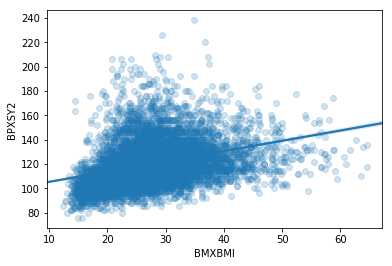

In [43]:
sns.regplot(x=bmi_col, y=bp_col, data=df, fit_reg=True, scatter_kws={"alpha": 0.2})

In [44]:
# There is a small correlation - a higher BMI is weakly associated with a higher systolic BP

In [46]:
# Segment by gender to see if the effect is stronger in only one gender
# Note: In column RIAGENDR, 1 = Male, 2 = Female

gender_col = "RIAGENDR"

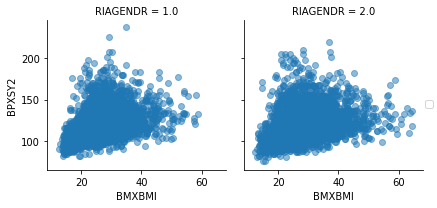

In [47]:
_ = sns.FacetGrid(df, col=gender_col).map(plt.scatter, bmi_col, bp_col, alpha=0.5).add_legend()

In [50]:
df = combined_2016

for gender_response in df[gender_col].dropna().unique():
    gender_filter = (df[gender_col] == gender_response)
    filtered_df = df[gender_filter]
    
    cols = [bp_col, bmi_col]
    print("Gender Response: {}".format(gender_response))
    print(filtered_df[cols].corr())
    print("\n")

Gender Response: 1.0
          BPXSY2    BMXBMI
BPXSY2  1.000000  0.369521
BMXBMI  0.369521  1.000000


Gender Response: 2.0
          BPXSY2    BMXBMI
BPXSY2  1.000000  0.331401
BMXBMI  0.331401  1.000000




In [51]:
# Systolic blood pressure and BMI are positively associated in both genders,
# although the association is slightly higher in men
# However, the association is fairly weak in both genders